<a href="https://colab.research.google.com/github/RishiSelam/SCT_ML_04/blob/main/SCT_ML_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import tensorflow_datasets as tfds
import os

# Setting hyper-parameters
batch_size = 32
num_classes = 3
epochs = 3
"""Loading and preparing the data"""


# Loading rock_paper_scissors dataset and preprocessing it
def load_data():
    def preprocess_image(image, label):
        # convert [0, 255] range integers to [0, 1] range floats
        image = tf.image.convert_image_dtype(image, tf.float32)
        return image, label

    # loading the dataset, split into train and test
    ds_train, info = tfds.load("rock_paper_scissors", with_info=True, split="train", as_supervised=True)
    ds_test = tfds.load("rock_paper_scissors", split="test", as_supervised=True)

    # repeat dataset forever, shuffle the images, preprocess the images, split by batch
    ds_train = ds_train.repeat().shuffle(1024).map(preprocess_image).batch(batch_size)
    ds_test = ds_test.repeat().shuffle(1024).map(preprocess_image).batch(batch_size)
    return ds_train, ds_test, info


"""Creating the model"""


def create_model():
    model = Sequential()
    model.add(AveragePooling2D(6, 3, input_shape=(300, 300, 3)))
    model.add(Conv2D(64, 3, activation='relu'))
    model.add(Conv2D(32, 3, activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # print the summary of the model architecture
    model.summary()
    # training the model using adam optimizer
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


"""Execute our stuff: load data, initiate model, train model"""

# load data
ds_train, ds_test, info = load_data()

# execute the create model function
model = create_model()

# callbacks for fitting our model
logdir = os.path.join("logs", "rps-model")
tensorboard = TensorBoard(log_dir=logdir)


# create 'results' folder if it doesnt exist yet
if not os.path.isdir("results"):
    os.mkdir("results")

# training the model
model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=1,
          steps_per_epoch=info.splits["train"].num_examples // batch_size,
          validation_steps=info.splits["test"].num_examples // batch_size,
          callbacks=[tensorboard])

"""Evaluate the model with test data"""
# load the test data
# batch_size=-1 to get the full dataset in NumPy arrays from the returned tf.Tensor object
rock_paper_scissors_test = tfds.load(name="rock_paper_scissors", split='test', batch_size=-1)

# make NumPy array records out of a tf.data.Dataset
rock_paper_scissors_test = tfds.as_numpy(rock_paper_scissors_test)

# separate the x (input image) and y (output label)
x_test, y_test = rock_paper_scissors_test["image"], rock_paper_scissors_test["label"]

# evaluate and save the model
model.evaluate(x_test, y_test)
model.save("RPSmodel.h5")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.S96JTV_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.S96JTV_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (Average  (None, 99, 99, 3)         0         
 Pooling2D)                                                      
                                                                 
 conv2d (Conv2D)             (None, 97, 97, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 47, 47, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 47, 4

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 268ms/step
Predicted label: paper
True label: paper


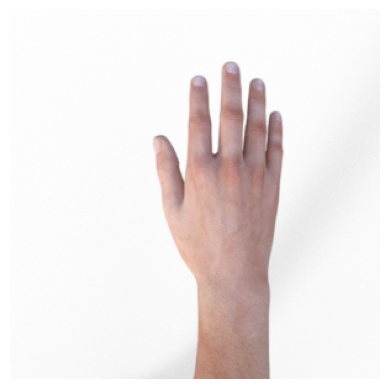

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Setting hyper-parameters
batch_size = 32
num_classes = 3
epochs = 3


def load_data():
    def preprocess_image(image, label):
        # convert [0, 255] range integers to [0, 1] range floats
        image = tf.image.convert_image_dtype(image, tf.float32)
        return image, label

    # loading the dataset, split into train and test
    ds_train, info = tfds.load("rock_paper_scissors", with_info=True, split="train", as_supervised=True)
    ds_test = tfds.load("rock_paper_scissors", split="test", as_supervised=True)

    # repeat dataset forever, shuffle the images, preprocess the images, split by batch
    ds_train = ds_train.repeat().shuffle(1024).map(preprocess_image).batch(batch_size)
    ds_test = ds_test.repeat().shuffle(1024).map(preprocess_image).batch(batch_size)
    return ds_train, ds_test, info


ds_train, ds_test, info = load_data()

# rock-paper-scissors classes
categories = {
    0: "rock",
    1: "paper",
    2: "scissors"
}

# load the model
loaded_model = load_model("RPSmodel.h5")

# predict an image
data_sample = next(iter(ds_test))
sample_image = data_sample[0].numpy()[0]
sample_label = categories[data_sample[1].numpy()[0]]
prediction = np.argmax(loaded_model.predict(sample_image.reshape(-1, *sample_image.shape))[0])
print("Predicted label:", categories[prediction])
print("True label:", sample_label)

# show the image
plt.axis('off')
plt.imshow(sample_image)
plt.show()